<a href="https://colab.research.google.com/github/sarthak363/wine_quality_prediction/blob/main/ProjectFinalYear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **PREDICTING WINE QUALITY USING WINE QUALITY DATASET**




Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Importing Data

In [ ]:
df = pd.read_csv("winequality-red.csv")

Exploring Data

In [ ]:
# See the number of rows and columns
print("Rows, columns: " + str(df.shape))
# See the first five rows of the dataset
df.head()

Rows, columns: (1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


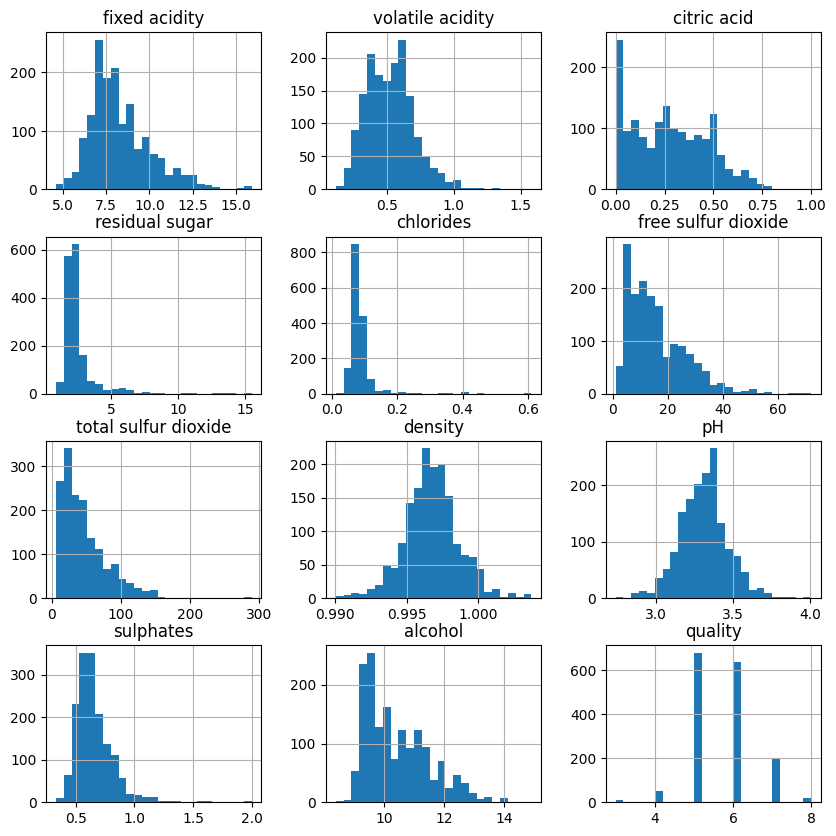

In [ ]:
df.hist(bins=25,figsize=(10,10))
# display histogram
plt.show()

Missing Values

In [ ]:
# Missing Values
print(df.isna().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [ ]:
#df["fixed acidity"].fillna(df["fixed acidity"].mean(), inplace = True)
#df["volatile acidity"].fillna(df["volatile acidity"].mean(), inplace = True)
#df["citric acid"].fillna(df["citric acid"].mean(), inplace = True)
#df["residual sugar"].fillna(df["residual sugar"].mean(), inplace = True)
# df["chlorides"].fillna(df["chlorides"].mean(), inplace = True)
# df["pH"].fillna(df["pH"].mean(), inplace = True)
# df["sulphates"].fillna(df["sulphates"].mean(), inplace = True)

In [ ]:
# print(df.isna().sum())

Exploring Variables


Histogram of ‘quality’ variable

In [ ]:
fig = px.histogram(df,x='quality')
fig.show()

Text(0, 0.5, 'alcohol')

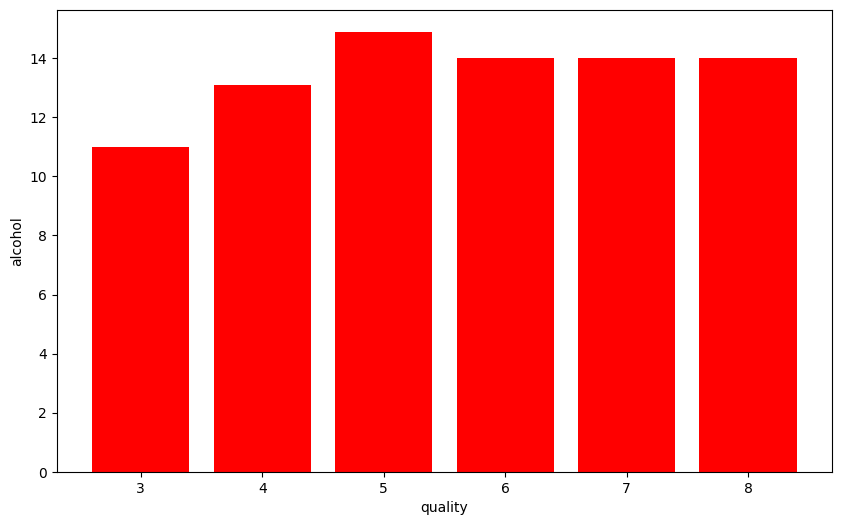

In [ ]:
plt.figure(figsize=[10,6])
# plot bar graph
plt.bar(df['quality'],df['alcohol'],color='red')
# label x-axis
plt.xlabel('quality')
#label y-axis
plt.ylabel('alcohol')

Correlation Matrix

<Axes: >

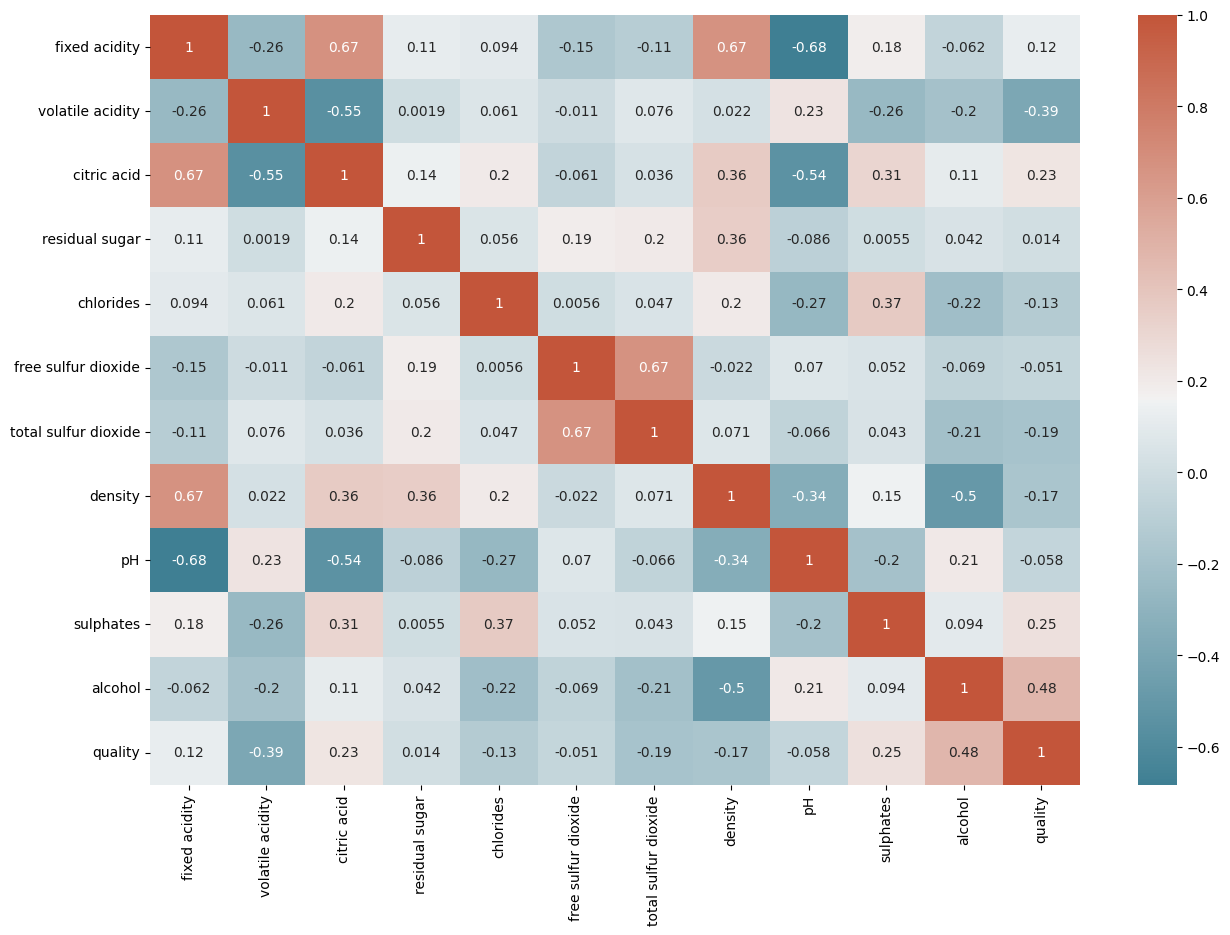

In [ ]:
corr = df.corr()
matplotlib.pyplot.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

Convert to a Classification Problem

In [ ]:
# Create Classification version of target variable
df['goodquality'] = [1 if x >= 5 else 0 for x in df['quality']]
# Separate feature variables and target variable
X = df.drop(['quality','goodquality'], axis = 1)
y = df['goodquality']

Proportion of Good vs Bad Wines

In [ ]:
# See proportion of good vs bad wines
df['goodquality'].value_counts()

1    1536
0      63
Name: goodquality, dtype: int64

Preparing Data for Modelling

Standardizing Feature Variables

In [ ]:
# Normalize feature variables
from sklearn.preprocessing import StandardScaler
X_features = X
X = StandardScaler().fit_transform(X)

Split data

In [ ]:
# Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)

Modelling

Model 1: Decision Tree

In [ ]:
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier(random_state=1)
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.12      0.12      0.12        16
           1       0.96      0.96      0.96       384

    accuracy                           0.93       400
   macro avg       0.54      0.54      0.54       400
weighted avg       0.93      0.93      0.93       400



Model 2: Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(random_state=1)
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.96      1.00      0.98       384

    accuracy                           0.96       400
   macro avg       0.48      0.50      0.49       400
weighted avg       0.92      0.96      0.94       400



Model 3: AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model3 = AdaBoostClassifier(random_state=1)
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.33      0.06      0.11        16
           1       0.96      0.99      0.98       384

    accuracy                           0.96       400
   macro avg       0.65      0.53      0.54       400
weighted avg       0.94      0.96      0.94       400



Model 4: Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model4 = GradientBoostingClassifier(random_state=1)
model4.fit(X_train, y_train)
y_pred4 = model4.predict(X_test)
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.96      0.99      0.97       384

    accuracy                           0.95       400
   macro avg       0.48      0.49      0.49       400
weighted avg       0.92      0.95      0.93       400



Model 5: XGBoost

In [ ]:
import xgboost as xgb
model5 = xgb.XGBClassifier(random_state=1)
model5.fit(X_train, y_train)
y_pred5 = model5.predict(X_test)
print(classification_report(y_test, y_pred5))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.96      0.99      0.98       384

    accuracy                           0.95       400
   macro avg       0.48      0.50      0.49       400
weighted avg       0.92      0.95      0.94       400



Feature Importance

via Random Forest

<Axes: >

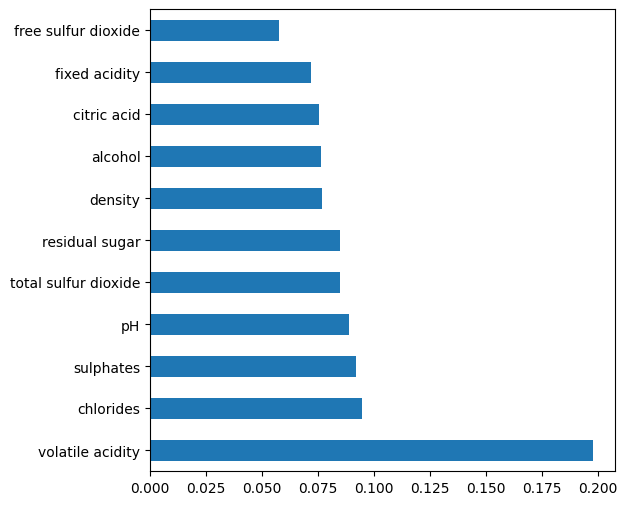

In [ ]:
feat_importances = pd.Series(model2.feature_importances_, index=X_features.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(6,6))

via XGBoost

<Axes: >

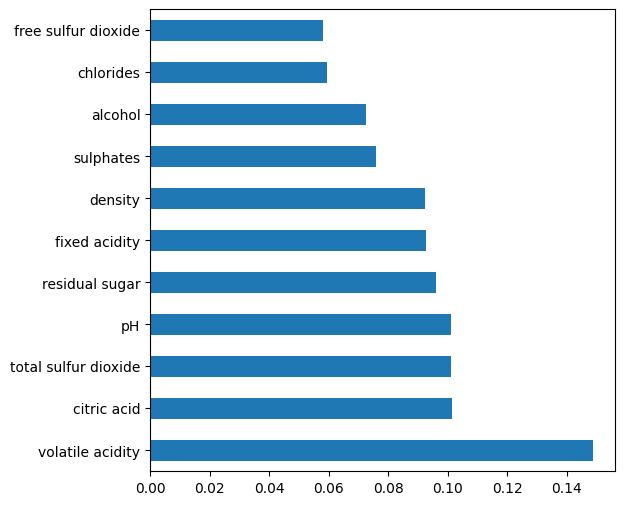

In [ ]:
feat_importances = pd.Series(model5.feature_importances_, index=X_features.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(6,6))

Comparing the Top 4 Features

In [ ]:
# Filtering df for only good quality
df_temp = df[df['goodquality']==1]
df_temp.describe()
# Filtering df for only bad quality
df_temp2 = df[df['goodquality']==0]
df_temp2.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,goodquality
count,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.0
mean,7.871429,0.724206,0.173651,2.684921,0.095730,12.063492,34.444444,0.996689,3.384127,0.592222,10.215873,3.841270,0.0
std,1.649284,0.247970,0.207406,1.723735,0.075121,9.076508,26.395123,0.001667,0.175100,0.224323,0.918178,0.368359,0.0
min,4.600000,0.230000,0.000000,1.200000,0.045000,3.000000,7.000000,0.993400,2.740000,0.330000,8.400000,3.000000,0.0
25%,6.800000,0.565000,0.020000,1.900000,0.068500,5.000000,13.500000,0.995655,3.300000,0.495000,9.600000,4.000000,0.0
50%,7.500000,0.680000,0.080000,2.100000,0.080000,9.000000,26.000000,0.996600,3.380000,0.560000,10.000000,4.000000,0.0
75%,8.400000,0.882500,0.270000,2.950000,0.094500,15.500000,48.000000,0.997700,3.500000,0.600000,11.000000,4.000000,0.0
max,12.500000,1.580000,1.000000,12.900000,0.610000,41.000000,119.000000,1.001000,3.900000,2.000000,13.100000,4.000000,0.0


In [ ]:
df_testing = pd.read_csv("testing-01.csv")

In [ ]:
# Normalize feature variables
from sklearn.preprocessing import StandardScaler
X_features = df_testing
X_testing = StandardScaler().fit_transform(df_testing)

In [ ]:
y_pred_testing = model1.predict(X_testing)
print(y_pred_testing)


[1]
